# Cricket Player Embeddings
## Thomas Body

In [138]:
from pathlib import Path
import pandas as pd
import numpy as np
from fastai.tabular import *
from fastai import *
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
# Path file to the data
path = Path("data")
files = list(path.iterdir())
files

[PosixPath('data/bowlers_combined_data.csv'),
 PosixPath('data/batters_combined_data.csv')]

## Creating, inspecting, and cleaning the batters and bowlers dataframes

In [3]:
# Creates the batters and bowlers dataframes from the csv files
batters_df = pd.read_csv(files[1])
bowlers_df = pd.read_csv(files[0])

# Creating a list of both dataframes
dfs = [batters_df, bowlers_df]

In [4]:
bowlers_df.columns

Index(['Unnamed: 0', 'Player', 'Overs', 'Maidens', 'Runs', 'Wickets',
       'EconRate', 'Date', 'Location', 'Result', 'Innings', 'Team',
       'BatSideRR', 'BatSideWicketsLost', 'BatSideScore', 'Win'],
      dtype='object')

In [5]:
batters_df.columns

Index(['Unnamed: 0', 'Player', 'Dismissal', 'Runs', 'BallsFaced', 'Fours',
       'Sixes', 'StrikeRate', 'Date', 'Location', 'Result', 'Innings', 'Team',
       'BatSideRR', 'BatSideWicksLost', 'BatSideScore', 'Win'],
      dtype='object')

In [6]:
# Dropping the Unnamed: 0 column from both dataframes
for df in dfs:
    df.drop("Unnamed: 0", axis=1, inplace=True)

In [7]:
batters_df.head().T

,0,1,2,3,4
Player,Mudassar Nazar,Mohsin Khan,Zaheer Abbas,Javed Miandad,Haroon Rashid
Dismissal,b De Silva,run out,c Madugalle b Ratnayeke,run out,not out
Runs,27,6,123,1,63
BallsFaced,57,14,87,7,72
Fours,1,0,15,0,5
Sixes,0,0,3,0,0
StrikeRate,47.37,42.86,141.38,14.29,87.5
Date,"29th March, 1982","29th March, 1982","29th March, 1982","29th March, 1982","29th March, 1982"
Location,"Gaddafi Stadium, Lahore","Gaddafi Stadium, Lahore","Gaddafi Stadium, Lahore","Gaddafi Stadium, Lahore","Gaddafi Stadium, Lahore"
Result,Sri Lanka won by 30 runs [Revised Target],Sri Lanka won by 30 runs [Revised Target],Sri Lanka won by 30 runs [Revised Target],Sri Lanka won by 30 runs [Revised Target],Sri Lanka won by 30 runs [Revised Target]


In [8]:
bowlers_df.head().T

,0,1,2,3,4
Player,A L F De Mel,J R Ratnayeke,A N Ranasinghe,B Warnapura,D S De Silva
Overs,8,8,6,2,8
Maidens,1,1,0,0,0
Runs,31,42,33,21,49
Wickets,0,1,0,0,1
EconRate,3.88,5.25,5.5,10.5,6.13
Date,"29th March, 1982","29th March, 1982","29th March, 1982","29th March, 1982","29th March, 1982"
Location,"Gaddafi Stadium, Lahore","Gaddafi Stadium, Lahore","Gaddafi Stadium, Lahore","Gaddafi Stadium, Lahore","Gaddafi Stadium, Lahore"
Result,Sri Lanka won by 30 runs [Revised Target],Sri Lanka won by 30 runs [Revised Target],Sri Lanka won by 30 runs [Revised Target],Sri Lanka won by 30 runs [Revised Target],Sri Lanka won by 30 runs [Revised Target]
Innings,1,1,1,1,1


In [9]:
# Converting dates to datetime
for df in dfs:
    df['Date'] = pd.to_datetime(df['Date'])

In [10]:
# Add datepart function
def add_datepart(df, fldname, drop=True, time=False):
    "Helper function that adds columns relevant to a date."
    fld = df[fldname]
    fld_dtype = fld.dtype
    if isinstance(fld_dtype, pd.core.dtypes.dtypes.DatetimeTZDtype):
        fld_dtype = np.datetime64

    if not np.issubdtype(fld_dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']
    if time: attr = attr + ['Hour', 'Minute', 'Second']
    for n in attr: df[targ_pre + n] = getattr(fld.dt, n.lower())
    df[targ_pre + 'Elapsed'] = fld.astype(np.int64) // 10 ** 9
    if drop: df.drop(fldname, axis=1, inplace=True)

In [11]:
# Adding dateparts
for df in dfs:
    add_datepart(df, 'Date', drop=False)
    df.drop('Elapsed', axis=1, inplace=True)

In [12]:
# Splitting out the winning team and the result
for df in dfs:
    df['WinningTeam'] = df['Result'].str.split(' won').str[0]
    df['WonByHowMuch'] = df['Result'].str.split(' won').str[1].str.split(' by').str[1].str.split().str[0]
    df['WinByHowType'] = df['Result'].str.split(' won').str[1].str.split(' by').str[1].str.split().str[1]

In [13]:
# Replacing NaN values in batters_df with DNB (Did not bat)
for col in ['Dismissal', 'Runs', 'BallsFaced', 'Fours', 'Sixes', 'StrikeRate']:
    batters_df.loc[:, col].fillna('DNB', inplace=True)

In [14]:
# Removing tied matches and no results for simplicity
bowlers_df = bowlers_df[bowlers_df['Result']!=('No result' and 'Match tied')]
batters_df = batters_df[batters_df['Result']!=('No result' and 'Match tied')]

In [15]:
# Removing conceded matches
# Bowlers
bowlers_df = bowlers_df[bowlers_df.WonByHowMuch.isna()==False]
bowlers_df = bowlers_df[bowlers_df.WonByHowMuch!='losing']
bowlers_df = bowlers_df[bowlers_df.WonByHowMuch!='default']

# Batters
batters_df = batters_df[batters_df.WonByHowMuch.isna()==False]
batters_df = batters_df[batters_df.WonByHowMuch!='losing']
batters_df = batters_df[batters_df.WonByHowMuch!='default']

In [16]:
# TO DO - split dismissals in the batters_df

### The cleaned and expanded dataframes

In [17]:
batters_df.T

,0,1,2,3,4,5,6,7,8,9,...,77244,77245,77246,77247,77248,77249,77250,77251,77252,77253
Player,Mudassar Nazar,Mohsin Khan,Zaheer Abbas,Javed Miandad,Haroon Rashid,Imran Khan,Mansoor Akhtar,Ashraf Ali,Tahir Naqqash,Rashid Khan,...,Fakhar Zaman,Babar Azam,Mohammad Hafeez,Shoaib Malik,Sarfraz Ahmed,Shadab Khan,Faheem Ashraf,Imad Wasim,Hasan Ali,Shaheen Shah Afridi
Dismissal,b De Silva,run out,c Madugalle b Ratnayeke,run out,not out,not out,DNB,DNB,DNB,DNB,...,c Sodhi b Ferguson,c Nicholls b Ferguson,not out,c Sodhi b Ferguson,c Latham b Sodhi,not out,DNB,DNB,DNB,DNB
Runs,27,6,123,1,63,9,DNB,DNB,DNB,DNB,...,88,46,27,10,13,2,DNB,DNB,DNB,DNB
BallsFaced,57,14,87,7,72,6,DNB,DNB,DNB,DNB,...,88,50,31,13,17,10,DNB,DNB,DNB,DNB
Fours,1,0,15,0,5,2,DNB,DNB,DNB,DNB,...,11,5,2,1,1,0,DNB,DNB,DNB,DNB
Sixes,0,0,3,0,0,0,DNB,DNB,DNB,DNB,...,0,0,0,0,0,0,DNB,DNB,DNB,DNB
StrikeRate,47.37,42.86,141.38,14.29,87.5,150,DNB,DNB,DNB,DNB,...,100,92,87.1,76.92,76.47,20,DNB,DNB,DNB,DNB
Date,1982-03-29 00:00:00,1982-03-29 00:00:00,1982-03-29 00:00:00,1982-03-29 00:00:00,1982-03-29 00:00:00,1982-03-29 00:00:00,1982-03-29 00:00:00,1982-03-29 00:00:00,1982-03-29 00:00:00,1982-03-29 00:00:00,...,2018-11-09 00:00:00,2018-11-09 00:00:00,2018-11-09 00:00:00,2018-11-09 00:00:00,2018-11-09 00:00:00,2018-11-09 00:00:00,2018-11-09 00:00:00,2018-11-09 00:00:00,2018-11-09 00:00:00,2018-11-09 00:00:00
Location,"Gaddafi Stadium, Lahore","Gaddafi Stadium, Lahore","Gaddafi Stadium, Lahore","Gaddafi Stadium, Lahore","Gaddafi Stadium, Lahore","Gaddafi Stadium, Lahore","Gaddafi Stadium, Lahore","Gaddafi Stadium, Lahore","Gaddafi Stadium, Lahore","Gaddafi Stadium, Lahore",...,"Sheikh Zayed Stadium, Abu Dhabi","Sheikh Zayed Stadium, Abu Dhabi","Sheikh Zayed Stadium, Abu Dhabi","Sheikh Zayed Stadium, Abu Dhabi","Sheikh Zayed Stadium, Abu Dhabi","Sheikh Zayed Stadium, Abu Dhabi","Sheikh Zayed Stadium, Abu Dhabi","Sheikh Zayed Stadium, Abu Dhabi","Sheikh Zayed Stadium, Abu Dhabi","Sheikh Zayed Stadium, Abu Dhabi"
Result,Sri Lanka won by 30 runs [Revised Target],Sri Lanka won by 30 runs [Revised Target],Sri Lanka won by 30 runs [Revised Target],Sri Lanka won by 30 runs [Revised Target],Sri Lanka won by 30 runs [Revised Target],Sri Lanka won by 30 runs [Revised Target],Sri Lanka won by 30 runs [Revised Target],Sri Lanka won by 30 runs [Revised Target],Sri Lanka won by 30 runs [Revised Target],Sri Lanka won by 30 runs [Revised Target],...,Pakistan won by 6 wickets,Pakistan won by 6 wickets,Pakistan won by 6 wickets,Pakistan won by 6 wickets,Pakistan won by 6 wickets,Pakistan won by 6 wickets,Pakistan won by 6 wickets,Pakistan won by 6 wickets,Pakistan won by 6 wickets,Pakistan won by 6 wickets


In [18]:
bowlers_df.T

,0,1,2,3,4,5,6,7,8,9,...,42282,42283,42284,42285,42286,42287,42288,42289,42290,42291
Player,A L F De Mel,J R Ratnayeke,A N Ranasinghe,B Warnapura,D S De Silva,A Ranatunga,Imran Khan,Sikander Bakht,Tahir Naqqash,Mudassar Nazar,...,Hasan Ali,Mohammad Hafeez,Shadab Khan,Imad Wasim,T A Boult,T G Southee,L H Ferguson,K S Williamson,I S Sodhi,C de Grandhomme
Overs,8,8,6,2,8,8,5,5,8,8,...,9,10,10,5,10,9.3,10,1,6,4
Maidens,1,1,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,2,0
Runs,31,42,33,21,49,53,20,15,65,56,...,59,31,25,24,60,48,60,7,21,15
Wickets,0,1,0,0,1,0,0,1,1,2,...,2,1,1,0,0,0,3,0,1,0
EconRate,3.88,5.25,5.5,10.5,6.13,6.63,4,3,8.13,7,...,6.56,3.1,2.5,4.8,6,5.05,6,7,3.5,3.75
Date,1982-03-29 00:00:00,1982-03-29 00:00:00,1982-03-29 00:00:00,1982-03-29 00:00:00,1982-03-29 00:00:00,1982-03-29 00:00:00,1982-03-29 00:00:00,1982-03-29 00:00:00,1982-03-29 00:00:00,1982-03-29 00:00:00,...,2018-11-09 00:00:00,2018-11-09 00:00:00,2018-11-09 00:00:00,2018-11-09 00:00:00,2018-11-09 00:00:00,2018-11-09 00:00:00,2018-11-09 00:00:00,2018-11-09 00:00:00,2018-11-09 00:00:00,2018-11-09 00:00:00
Location,"Gaddafi Stadium, Lahore","Gaddafi Stadium, Lahore","Gaddafi Stadium, Lahore","Gaddafi Stadium, Lahore","Gaddafi Stadium, Lahore","Gaddafi Stadium, Lahore","Gaddafi Stadium, Lahore","Gaddafi Stadium, Lahore","Gaddafi Stadium, Lahore","Gaddafi Stadium, Lahore",...,"Sheikh Zayed Stadium, Abu Dhabi","Sheikh Zayed Stadium, Abu Dhabi","Sheikh Zayed Stadium, Abu Dhabi","Sheikh Zayed Stadium, Abu Dhabi","Sheikh Zayed Stadium, Abu Dhabi","Sheikh Zayed Stadium, Abu Dhabi","Sheikh Zayed Stadium, Abu Dhabi","Sheikh Zayed Stadium, Abu Dhabi","Sheikh Zayed Stadium, Abu Dhabi","Sheikh Zayed Stadium, Abu Dhabi"
Result,Sri Lanka won by 30 runs [Revised Target],Sri Lanka won by 30 runs [Revised Target],Sri Lanka won by 30 runs [Revised Target],Sri Lanka won by 30 runs [Revised Target],Sri Lanka won by 30 runs [Revised Target],Sri Lanka won by 30 runs [Revised Target],Sri Lanka won by 30 runs [Revised Target],Sri Lanka won by 30 runs [Revised Target],Sri Lanka won by 30 runs [Revised Target],Sri Lanka won by 30 runs [Revised Target],...,Pakistan won by 6 wickets,Pakistan won by 6 wickets,Pakistan won by 6 wickets,Pakistan won by 6 wickets,Pakistan won by 6 wickets,Pakistan won by 6 wickets,Pakistan won by 6 wickets,Pakistan won by 6 wickets,Pakistan won by 6 wickets,Pakistan won by 6 wickets
Innings,1,1,1,1,1,1,2,2,2,2,...,1,1,1,1,2,2,2,2,2,2


In [19]:
bowlers_df.columns

Index(['Player', 'Overs', 'Maidens', 'Runs', 'Wickets', 'EconRate', 'Date',
       'Location', 'Result', 'Innings', 'Team', 'BatSideRR',
       'BatSideWicketsLost', 'BatSideScore', 'Win', 'Year', 'Month', 'Week',
       'Day', 'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start',
       'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start',
       'WinningTeam', 'WonByHowMuch', 'WinByHowType'],
      dtype='object')

In [20]:
batters_df.columns

Index(['Player', 'Dismissal', 'Runs', 'BallsFaced', 'Fours', 'Sixes',
       'StrikeRate', 'Date', 'Location', 'Result', 'Innings', 'Team',
       'BatSideRR', 'BatSideWicksLost', 'BatSideScore', 'Win', 'Year', 'Month',
       'Week', 'Day', 'Dayofweek', 'Dayofyear', 'Is_month_end',
       'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end',
       'Is_year_start', 'WinningTeam', 'WonByHowMuch', 'WinByHowType'],
      dtype='object')

### Designating categorical and continuous variables

#### Batters

In [21]:
# Batter categorical and continuous variables TO DO
cat_vars = ['Player', 'Dismissal', 'Runs', 'BallsFaced', 'Fours', 'Sixes',
       'StrikeRate', 'Date', 'Location', 'Result', 'Innings', 'Team',
       'BatSideRR', 'BatSideWicksLost', 'BatSideScore', 'Win', 'WinningTeam',
       'WonByHowMuch', 'WinByHowType', 'Year', 'Month', 'Week', 'Day',
       'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start',
       'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start',
       'Elapsed']

cont_vars = []

#### Bowlers

In [24]:
# Bowler categorical and continuous variables
cat_vars_bowl = ['Player', 'Date', 'Location', 'Result', 'Innings', 'Team',  'Win', 
            'WinningTeam', 'WinByHowType', 'Year', 'Month', 'Week', 'Day', 
            'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start',
            'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']

cont_vars_bowl = ['Overs', 'Maidens', 'Runs', 'Wickets', 'EconRate',
            'BatSideRR', 'BatSideWicketsLost', 'BatSideScore', 'WonByHowMuch']

In [25]:
# Designating categorical variables in the bowlers_df
for cat_var in cat_vars_bowl:
    bowlers_df[cat_var] = bowlers_df[cat_var].astype('category').cat.as_ordered()

In [26]:
# Designating continuous variables in the bowlers_df
for cont_var in cont_vars_bowl:
    bowlers_df[cont_var] = bowlers_df[cont_var].astype('float32')

### Creating Embedding sizes

In [27]:
# Checking the size of each category
# The +1 is for an 'unknown' or 'other' column in the embedding matrix
cat_sz_bowl = [(column, len(bowlers_df[column].cat.categories)+1) for column in cat_vars_bowl]
cat_sz_bowl

[('Player', 1598),
 ('Date', 2966),
 ('Location', 191),
 ('Result', 1325),
 ('Innings', 3),
 ('Team', 27),
 ('Win', 4),
 ('WinningTeam', 24),
 ('WinByHowType', 8),
 ('Year', 38),
 ('Month', 13),
 ('Week', 54),
 ('Day', 32),
 ('Dayofweek', 8),
 ('Dayofyear', 366),
 ('Is_month_end', 3),
 ('Is_month_start', 3),
 ('Is_quarter_end', 3),
 ('Is_quarter_start', 3),
 ('Is_year_end', 3),
 ('Is_year_start', 3)]

In [29]:
# Creating the embedding sizes
emb_szs = [(cardinality, min(50, (cardinality+1)//2)) for _, cardinality in cat_sz_bowl]
emb_szs

[(1598, 50),
 (2966, 50),
 (191, 50),
 (1325, 50),
 (3, 2),
 (27, 14),
 (4, 2),
 (24, 12),
 (8, 4),
 (38, 19),
 (13, 7),
 (54, 27),
 (32, 16),
 (8, 4),
 (366, 50),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2)]

## Which bowlers are similar based on match statistics?

In [28]:
# The number of bowlers in the dataset
len(set(bowlers_df['Player']))

1597

In [30]:
# Subsetting for only the key columns
bowler_similarity_df = bowlers_df[['Player', 'Overs', 'Maidens', 'Runs', 'Wickets', 
                                  'EconRate', 'Location', 'BatSideWicketsLost', 
                                  'BatSideScore', 'WinningTeam', 
                                  'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear']]

In [48]:
X = bowler_similarity_df.groupby(by='Player').mean()

In [49]:
X

,Overs,Maidens,Runs,Wickets,EconRate,BatSideWicketsLost,BatSideScore
Player,,,,,,,
A A Donald,8.767097,0.619355,36.490322,1.645161,4.175097,8.025806,200.419357
A B Agarkar,8.459890,0.543956,42.895603,1.543956,5.174506,7.500000,229.368134
A B Dinda,7.523077,0.153846,47.076923,0.923077,6.242308,5.846154,265.000000
A B de Villiers,3.750000,0.000000,23.875000,0.875000,6.480000,8.625000,250.500000
A Balbirnie,4.500000,0.000000,28.500000,1.000000,6.475000,6.000000,211.500000
A Bhandari,8.700000,0.000000,53.000000,2.500000,5.770000,8.500000,215.000000
A C Agar,7.600000,0.000000,45.400002,1.000000,5.956000,7.200000,315.000000
A C Botha,8.000000,0.684211,35.789474,1.421053,4.305789,6.947369,220.421051
A C Cummins,8.468056,0.388889,39.166668,1.222222,4.675972,7.291667,205.291672


In [125]:
kmeans = KMeans(n_clusters=15, n_init=100).fit(X)

In [126]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = X.index.values
cluster_map['cluster'] = kmeans.labels_

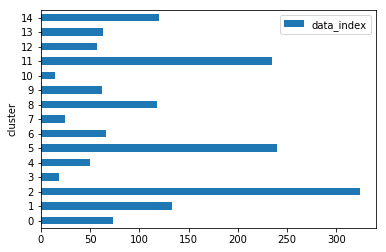

In [127]:
cluster_map.groupby(by='cluster').count().plot.barh()

In [162]:
bowlers = set(cluster_map.data_index)

In [163]:
players_of_interest = ['G D McGrath', 'A A Donald', 'Waqar Younis', 'Wasim Akram', 'S K Warne',
              'M Muralitharan', 'R J Hadlee', 'D L Vettori', 'A Kumble', 'S C G MacGill',
              'D W Steyn', 'M J Clarke', 'M A Starc', 'D K Lillee']

In [164]:
cluster_map[cluster_map.data_index.isin(players_of_interest)].sort_values(by='cluster')

,data_index,cluster
59,A Kumble,2
362,D K Lillee,2
371,D L Vettori,2
901,M Muralitharan,2
1281,S C G MacGill,2
1316,S K Warne,2
412,D W Steyn,5
833,M A Starc,5
868,M J Clarke,8
0,A A Donald,11
